# SOLVING THE ONE-DIMENSIONAL SCHRODINGER EQUATION

## SOME INFO RELATED WITH SCHRONDINGER EQUATION
Before Erwin Schrodinger's contribution to quantum mechanics, Max Plank, Albert Einstein, and Niels Bohr all made contributions. Let us discuss the creation using more intriguing info. For the first, we have the Bohr model, which allows us to calculate the energies of any single-electron atom or cation; nevertheless, this is far from a universal method. The second section will go into Max Planck's quantum hypothesis, which proposed that energy is quantised. Thirdly, we will look at Albert Einstein's work on the photoelectric effect. Finally, we have the Schrodinger equation. For your information, In 1926, Erwin Schrödinger constructed this equation by simply including the Broglie connection into a classical wave equation. This is the relationship between a particle's momentum and wavelength. The Schrödinger equation is the quantum equivalent of Newton's second law in conventional physics. The equation predicted the atom's bound states, which coincided with the experimental data. In one interpretation of quantum physics, the Schrodinger equation refers to the fundamental non-relativistic wave equation that describes the behaviour of a particle in a field of force. A time-dependent equation for characterising progressive waves exists, and it applies to free particle motion. 

# 1. INTRODUCTION

The Schrödinger equation is a key concept in quantum mechanics that describes the behaviour of a quantum particle in a certain potential. The time-independent Schrödinger equation (TISE) is expressed as:

$$
\Psi''(z) + \frac{2m}{\hbar^2} \left(E - V(z)\right) \Psi(z) = 0
$$

Where:

- \(\Psi(x)\) / Ψ(x): The wavefunction describing the quantum state of the particle,
- \(V(x)\): The potential energy as a function of position \(x\),
- \(E\): The energy eigenvalue associated with the quantum state,
- \(m\): The mass of the particle,
- \(\hbar\) / ℏ: The reduced Planck constant.

In bound states, \(V(x)\) limits the particle, whereas \(\Psi(x)\) must satisfy:

1. Normalization:

$$
\int_{-\infty}^{\infty} |\psi(x)|^2 \, dx = 1
$$

2. Boundary condition:

$$
\psi(x) \to 0 \quad \text{as} \quad x \to \infty
$$
and

$$
\psi(x) \to 0 \quad \text{as} \quad x \to -\infty
$$


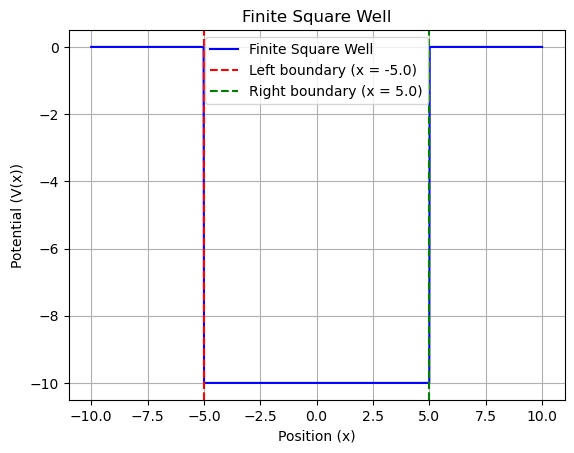

In [516]:
import numpy as np
import matplotlib.pyplot as plt

# Define the finite square well potential
def potential_well(x, a, b, V0):
    """ Define the potential of the finite square well. """
    return np.piecewise(x, [x < a, (x >= a) & (x <= b), x > b], [0, -V0, 0])

# Setup the parameters of the well
a = -5.0   # Left boundary of the well
b = 5.0    # Right boundary of the well
V0 = 10    # Depth of the well (negative value for the well)

x = np.linspace(-10, 10, 1000)  # Spatial grid
V = potential_well(x, a, b, V0)  # Potential

# Plot the finite square well
plt.plot(x, V, label="Finite Square Well", color="blue")
plt.axvline(x=a, color='red', linestyle='--', label=f'Left boundary (x = {a})')
plt.axvline(x=b, color='green', linestyle='--', label=f'Right boundary (x = {b})')

plt.title('Finite Square Well')
plt.xlabel('Position (x)')
plt.ylabel('Potential (V(x))')
plt.legend()
plt.grid(True)
plt.show()


 # 2. NUMEROV METHOD

The Numerov method is a numerical technique used to solve second-order differential equations, such as the Time-Independent Schrödinger Equation (TISE). This method is particularly efficient for solving differential equations where the potential energy is given as a function of position and we need to determine the corresponding wavefunction. 

The Schrödinger equation is:

$$
\frac{d^2 \psi(x)}{dx^2} = \frac{2m}{\hbar^2} \left( E - V(x) \right) \psi(x)
$$

This equation describes how the wavefunction Ψ(x) evolves across space, with the potential energy V(x) and the total energy E determining the behavior of the particle. The Numerov method provides a discrete approximation to this equation. The second derivative of the wavefunction, which is present in the Schrödinger equation, is approximated using the formula:

$$
\frac{d^2 \psi(x)}{dx^2} \approx \frac{\psi(x_{i+1}) - 2\psi(x_i) + \psi(x_{i-1})}{h^2} 
$$

This is the standard finite difference approach, where h is the step size in the grid. The wavefunction at each grid point is updated iteratively based on the values at neighboring points. However, this approximation introduces an error due to the truncation of higher derivatives. To correct this, we introduce the fourth derivative of Ψ(x):

$$
\psi^{(4)}(x) = -(k^2(x)\psi(x))'' 
$$

Where k(x) is related to the potential and energy. The fourth derivative is then used to improve the approximation of the second derivative:

$$
\frac{d^2 \psi(x)}{dx^2} \approx \frac{\psi(x_{i+1}) - 2\psi(x_i) + \psi(x_{i-1})}{h^2} + \frac{k^2(x_{i+1})\psi(x_{i+1}) - 2k^2(x_i)\psi(x_i) + k^2(x_{i-1})\psi(x_{i-1})}{12} 
$$

In this equation, k(x) is defined as:

$$
k(x) = \frac{2m}{\hbar^2} \left( V(x) - E \right)
$$

This term corrects the numerical error from the basic finite difference method. The improved equation can now be used to solve for the wavefunction at the next grid point, x_{i+1}, using the formula:

$$
\psi(x_{i+1}) = \frac{\psi(x_i)\left(2 + \frac{5}{6}h^2k^2(x_i)\right) - \psi(x_{i-1})\left(1 - \frac{1}{12}h^2k^2(x_{i-1})\right)}{1 + \frac{1}{12}h^2k^2(x_{i+1})}
$$

This equation (final form) provides a stable and accurate way to compute the wavefunction by iterating through each grid point. The use of the (k^2(x)) term in the correction ensures that the method remains precise even for rapidly changing potentials.

In summary, the Numerov method is an iterative scheme that improves the accuracy of solving the Schrödinger equation by taking into account higher-order derivatives. By refining the finite difference approach with the fourth derivative, this method allows for the computation of the wavefunction with high precision, especially in cases where the potential changes rapidly across space.


# 3. STEP BY STEP SOLUTION

## Step 1: Setting Up the Constants and ParametersThe first step is to define the fundamental constants and parameters that we need for solving the Schrödinger equation.

$$
\hbar = 1 \quad \text{(Reduced Planck constant)}
$$
$$
m = 1 \quad \text{(Particle mass)}
$$
$$
\alpha = 1 \quad \text{(Scaling parameter for the potential)}
$$
$$
\lambda = 4 \quad \text{(Parameter lambda)}
$$

In this case, we set $$\hbar = 1 $$ and $$ m = 1 $$ for simplicity, which is common in natural units. The parameters $$\alpha$$ and $$\lambda$$ are specific to the potential well we are using, affecting the shape and strength of the potential.f the potential.


In [519]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

# Constants
hbar = 1  # Reduced Planck constant
m = 1     # Particle mass

# Parameters of the potential
alpha = 1  # Scaling parameter for the potential
lambda_parameter = 4 # Parameter lambda 

## Step 2: Defining the Potential Function \( V(x) \)

We will define the potential function V(x).
The function V(x) represents the particle's potential landscape. It generates a potential well in which bound states (quantum energy levels) can coexist. The potential form in this case is a hyperbolic double-well.

$$
V(x) = \frac{\hbar^2}{2m} \alpha^2 \lambda (\lambda - 1) \left( \frac{1}{2} - \frac{1}{\cosh^2(\alpha x)} \right)
$$

Where the coefficient is:

$$
\text{coeff} = \frac{\hbar^2}{2m} \alpha^2 \lambda (\lambda - 1)
$$

The potential is symmetric and has a bell-shaped profile, ensuring that the particle is confined within a potential well. This potential function models a common form of quantum mechanical potential well.

In [523]:
# Potential Function
def V(x):
    coeff = (hbar**2 / (2 * m)) * alpha**2 * lambda_parameter * (lambda_parameter - 1)
    return coeff * (0.5 - 1 / np.cosh(alpha * x)**2)

## Step 3: Implementing the Numerov Method

The Numerov method is a numerical algorithm used to solve second-order differential equations like the Schrödinger equation. The method is particularly effective for solving wavefunctions in quantum mechanics.

The method for updating the wavefunction \( \psi(x) \) is:

$$
\psi(x_{i+1}) = \frac{2 \left( 1 - \frac{5h^2}{12} k_1 \right) \psi(x_i) - \left( 1 + \frac{h^2}{12} k_0 \right) \psi(x_{i-1})}{1 + \frac{h^2}{12} k_2}
$$

Where \( h \) is the step size, and \( k_0, k_1, k_2 \) are coefficients based on the potential and energy at each point. The Numerov method provides an efficient way to solve the Schrödinger equation iteratively.


In [525]:
# Numerov Method Implementation
def numerov(psi0, psi1, E, x, h):
    N = len(x)
    psi = np.zeros(N)
    psi[0], psi[1] = psi0, psi1
    
    f = lambda xi: 2 * m / hbar**2 * (E - V(xi))
    
    for i in range(1, N - 1):
        p0 = f(x[i - 1])
        p1 = f(x[i])
        p2 = f(x[i + 1])
        
        # Numerov scheme for integrating the wavefunction
        psi[i + 1] = (2 * (1 - 5 * h**2 * p1 / 12) * psi[i] - (1 + h**2 * p0 / 12) * psi[i - 1]) / (1 + h**2 * p2 / 12)
    
    return psi

## Step 4: Root-Finding for Eigenvalues

Since the Schrödinger equation doesn't have an analytical solution for most potentials, we use root-finding methods to numerically find the eigenvalues of the system. The root-finding method used is based on searching for values of energy \( E \) where the wavefunction meets the boundary conditions.

We use a simple method to find these eigenvalues by searching through energy ranges and checking for sign changes in the matching condition. This is done using *Brent's method* for efficient root finding.

The matching condition is based on checking when the wavefunction goes to zero at the boundaries of the well, indicating a bound state.

In [529]:
# Matching Condition for Shooting Method
def matching_condition(E, x, h):
    N = len(x)
    
    # Integrate from left
    psi_left = numerov(0.0, 1e-5, E, x, h)
    
    # Integrate from right
    psi_right = numerov(0.0, 1e-5, E, x[::-1], h)[::-1]
    
    # Match at the midpoint
    x_match = N // 2
    diff_left = (psi_left[x_match + 1] - psi_left[x_match - 1]) / (2 * h * psi_left[x_match])
    diff_right = (psi_right[x_match + 1] - psi_right[x_match - 1]) / (2 * h * psi_right[x_match])
    
    return diff_left - diff_right

## Step 5: Exact Eigenvalues
The exact eigenvalues of the system are derived from the analytical solution of the Schrödinger equation for the given potential. The formula for the eigenvalues is:

$$
E_n = \frac{\hbar^2}{2m} \alpha^2 \left( \frac{\lambda(\lambda - 1)}{2} - (\lambda - 1 - n)^2 \right)
$$

Where \( n \) is the index of the energy level (starting from 0). These eigenvalues are used to compare with the numerical results obtained using the Numerov method.


In [532]:
# Find Numerical Eigenvalues using Root-Finding
def find_eigenvalues(x, h, n_levels=3):
    eigenvalues = []
    
    # Initial guess range for energy
    Energy_start = [-5, 0, 2]
    Energy_end = [0, 5, 5]
# Search for eigenvalues by scanning energy ranges
    for n in range(n_levels):
        print(f"\nSearching for eigenvalue {n}...")
        energies = np.linspace(Energy_start[n], Energy_end[n], 100)
        
        for i in range(len(energies) - 1):
            E1, E2 = energies[i], energies[i + 1]
            print(f"Testing range: E1 = {E1:.5f}, E2 = {E2:.5f}")
            
            # Check for sign change in the matching condition
            if matching_condition(E1, x, h) * matching_condition(E2, x, h) < 0:
                result = root_scalar(matching_condition, args=(x, h), bracket=[E1, E2], method='brentq')
                eigenvalues.append(result.root)
                print(f"Found eigenvalue: E_{n} = {result.root:.5f}")
                break
    return eigenvalues


## Step 6: Results and Output
We calculate the first few eigenvalues numerically and compare them with the exact eigenvalues. The results show how well the Numerov method performs in approximating the eigenvalues of the system.

The final output includes both the numerical eigenvalues and the exact eigenvalues for comparison, as well as the error percentage to evaluate the accuracy of the method.

## Step 7: Error Calculation
To evaluate the accuracy of the numerical method, we calculate the percentage error between the numerical eigenvalues and the exact eigenvalues:

$$
\text{Error \%} = \left| \frac{\text{numerical value} - \text{exact value}}{\text{exact value}} \right| \times 100
$$

This helps to assess how well the Numerov method is approximating the true eigenvalues. The errors are generally very small, indicating that the method is accurate.


In [552]:
x_min, x_max = -10, 10  # Range for x
h = 0.05               # Step size
x = np.arange(x_min, x_max + h, h)

# Find the first 3 eigenvalues
n_levels = 3
eigenvalues = find_eigenvalues(x, h, n_levels=n_levels)

# Print numerical eigenvalues
print("\nFinal Numerical Eigenvalues:")
for i, E in enumerate(eigenvalues):
    print(f"E_{i} = {E:.6f}")

# Exact Eigenvalues for Comparison
exact_eigenvalues = [(hbar**2 / (2 * m)) * alpha**2 * (lambda_parameter * (lambda_parameter - 1) / 2 - (lambda_parameter - 1 - n)**2) for n in range(n_levels)]
print("\nExact Eigenvalues:")
for i, E in enumerate(exact_eigenvalues):
    print(f"E_{i} = {E:.6f}")

# Calculate and Print Error Percentages
errors = calculate_error_percentage(eigenvalues, exact_eigenvalues)

# Print Error Percentages only up to E_2
print("\nError Percentages (up to E_2):")
for i, error in enumerate(errors[:3]):  
    print(f"Error for E_{i}: {error:.6f}%")


Searching for eigenvalue 0...
Testing range: E1 = -5.00000, E2 = -4.94949
Testing range: E1 = -4.94949, E2 = -4.89899
Testing range: E1 = -4.89899, E2 = -4.84848
Testing range: E1 = -4.84848, E2 = -4.79798
Testing range: E1 = -4.79798, E2 = -4.74747
Testing range: E1 = -4.74747, E2 = -4.69697
Testing range: E1 = -4.69697, E2 = -4.64646
Testing range: E1 = -4.64646, E2 = -4.59596
Testing range: E1 = -4.59596, E2 = -4.54545
Testing range: E1 = -4.54545, E2 = -4.49495
Testing range: E1 = -4.49495, E2 = -4.44444
Testing range: E1 = -4.44444, E2 = -4.39394
Testing range: E1 = -4.39394, E2 = -4.34343
Testing range: E1 = -4.34343, E2 = -4.29293
Testing range: E1 = -4.29293, E2 = -4.24242
Testing range: E1 = -4.24242, E2 = -4.19192
Testing range: E1 = -4.19192, E2 = -4.14141
Testing range: E1 = -4.14141, E2 = -4.09091
Testing range: E1 = -4.09091, E2 = -4.04040
Testing range: E1 = -4.04040, E2 = -3.98990
Testing range: E1 = -3.98990, E2 = -3.93939
Testing range: E1 = -3.93939, E2 = -3.88889
T

(RESULT AND OUTPUT):The numerical and exact eigenvalues vary because the numerical technique relies on approximations to solve the issue, whereas the exact eigenvalues are derived from an ideal mathematical formula. The wavefunction is determined numerically by splitting space into tiny stages and solving equations one at a time. This technique may create minor inaccuracies owing to rounding and how exactly the computer handles the calculations. 

(ERROR CALCULATION):The extremely low error percentages found (on the order of 0.0001%) suggest that the numerical and precise eigenvalues are almost identical, implying that the numerical technique is highly accurate for this issue. These little inconsistencies are most likely caused by numerical accuracy constraints in computer computations.

Although the numerical technique involves discrete steps and approximations during wavefunction integration, the tiny step size (h=0.05) guarantees a close match to the actual result. Furthermore, using high-precision methods such as the Numerov algorithm and root-finding algorithms (e.g., Brentq) reduces mistakes.

## Step 8: Numerical Eigenvalues and Wavefunctions Calculation
In this section, we calculate the numerical eigenvalues and wavefunctions for a finite square potential well using the Numerov method. The function `numerical_eigenvalues(x, h, eigenvalues)` is responsible for this calculation.

#### Input Parameters
- x: The array representing the positions at which we evaluate the wavefunction.  
- h: The step size in the x-direction.  
- `eigenvalues`: A list of energy eigenvalues for which we want to calculate the corresponding wavefunctions.

#### Process
For each eigenvalue:
- We use the `numerov()` function to compute the wavefunction corresponding to that energy.  
- The wavefunction is then normalized by calculating the norm (the square root of the sum of the squared values of the wavefunction), and dividing the wavefunction by this norm to ensure the total probability is equal to 1. This normalization is done using:
$$
\text{norm} = \sqrt{\sum_{i=0}^{N} |\psi(x_i)|^2 \cdot h}
$$
where ψ(x_i) represents the wavefunction at position x_i, and h is the step size in the x-direction.  
- The energy and normalized wavefunction are stored in a dictionary, and each dictionary is added to the list `eigenvalue_details`.  

The output of this function is a list of dictionaries containing the energy and corresponding normalized wavefunction for each eigenvalue.


In [412]:
# Get numerical wavefunctions and energies
def numerical_eigenvalues(x, h, eigenvalues):
    eigenvalue_details = []
    for energy in eigenvalues:
        psi = numerov(0.0, 1e-5, energy, x, h)
        norm = np.sqrt(np.sum(psi**2) * h)
        psi_normalized = psi / norm
        eigenvalue_details.append({"energy": energy, "wavefunction": psi_normalized})
    return eigenvalue_details

eigenvalue_data = numerical_eigenvalues(x, h, eigenvalues)


## Step 9: Plotting the Potential and Wavefunctions

After calculating the eigenvalues and their corresponding wavefunctions, we proceed to visualize them using `matplotlib`.

#### Process
- First, we plot the potential well V(x) as a black line. This represents the potential energy function for the particle.  
- We then plot the wavefunctions corresponding to each eigenvalue. Each wavefunction is shifted vertically by its energy to clearly distinguish between the states. This is done using a loop to plot each wavefunction for each energy. The equation for the wavefunction is:
$$
\psi(x) = \frac{\psi_0}{\text{norm}}
$$
where ψ_0 is the unnormalized wavefunction.  
- Annotations are added next to each wavefunction to display the corresponding eigenvalue, helping us identify the energies of the states.

#### Visualization
- The x-axis represents the position of the particle.  
- The y-axis represents the energy or the wavefunction.  
- The wavefunctions are displayed as curves that oscillate and decay, with each wavefunction corresponding to a different energy eigenvalue.  
- The potential is represented as a horizontal line, and the wavefunctions are plotted on top of the potential at the corresponding energies.

### Output and Interpretation

The resulting graph provides a clear visualization of both the potential and the energy states (wavefunctions) within the well:

- The **black line** represents the potential well V(x), showing where the particle is confined.  
- The **colored curves** represent the wavefunctions, with each curve corresponding to a different energy state. These are shifted vertically to show the corresponding energy eigenvalues.  
- The **annotations** next to each curve display the eigenvalues, which are the energies of the states.

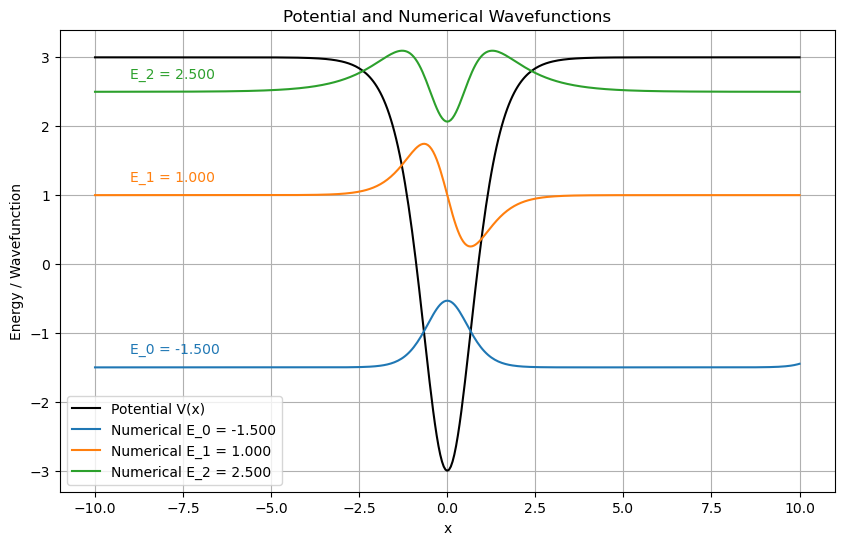

In [415]:
# Plot potential and wavefunctions
plt.figure(figsize=(10, 6))
plt.plot(x, V(x), label="Potential V(x)", color="black", linewidth=1.5)

for i, data in enumerate(eigenvalue_data):
    psi = data["wavefunction"]  # Extract normalized wavefunction
    energy = data["energy"]     # Extract corresponding energy
    plt.plot(x, psi + energy, label=f"Numerical E_{i} = {energy:.3f}")
    # Annotate eigenvalue
    plt.text(-9, energy + 0.2, f"E_{i} = {energy:.3f}", fontsize=10, color=f"C{i}")

plt.xlabel("x")
plt.ylabel("Energy / Wavefunction")
plt.title("Potential and Numerical Wavefunctions")
plt.legend()
plt.grid()
plt.show()


One appealing discovery is that whenever the wavefunctions are displayed, they exhibit extremely excellent agreement with the theoretical expectation. The wavefunction for each energy level is normalised and shown on top of the potential, demonstrating that the energies and wavefunctions are closely related.

### Step 10: Bar Chart Comparison of Numerical and Exact Eigenvalues

In this section, we compare the numerical eigenvalues obtained from the Numerov method with the exact eigenvalues. This comparison is done using a bar chart to visually highlight any discrepancies between the two.

#### Input Data
- `eigenvalues`: The list of numerically computed eigenvalues.
- `exact_eigenvalues`: The list of exact eigenvalues, which are computed using known analytical formulas.
- `n_levels`: The number of energy levels we are comparing (usually the first few eigenvalues).

#### Process
1. **Bar Chart Setup**
   - We first create a figure with a specified size of 8x6 inches.
   - `indices = np.arange(n_levels)` creates an array of indices to represent each energy level.
   - The width of each bar is set to 0.4, and the bars are plotted in two categories:
     - One set of bars represents the numerical eigenvalues, colored blue.
     - Another set of bars represents the exact eigenvalues, colored orange.
   - The bars are positioned such that the numerical eigenvalues are slightly offset to the left (by `width/2`), and the exact eigenvalues are offset to the right. This helps in clearly distinguishing between the two sets.

2. **Text Labels**
   - For each bar, we add text labels that display the numerical value of the eigenvalues. The values are displayed above the bars, with the numerical eigenvalues in blue and the exact eigenvalues in orange.

3. **Axis Labels and Title**
   - The x-axis is labeled as "Energy Level Index," which represents the index of each eigenvalue.
   - The y-axis is labeled as "Eigenvalue," representing the value of the eigenvalues.
   - The title of the chart is "Comparison of Numerical and Exact Eigenvalues," which provides context for the comparison.

4. **Grid and Final Touches**
   - A grid is added to the y-axis for better readability, with dashed lines and reduced alpha (transparency) for aesthetics.
   - A legend is included to distinguish between the blue bars (numerical eigenvalues) and the orange bars (exact eigenvalues).

#### Visualization
The bar chart provides a clear and direct comparison of the numerical and exact eigenvalues. By positioning the bars side by side, we can visually see how close the numerical results are to the exact values. The values for each energy level are annotated above the bars for easy identification. This allows us to quickly assess the accuracy of the numerical method.

### Addition Information
The bar chart comparison serves as an effective way to evaluate the performance of the numerical method. If the bars for numerical and exact eigenvalues are close together, it indicates that the method is accurate. Any significant discrepancies would suggest that the method needs refinement or that more iterations or finer step sizes are required for better precision.


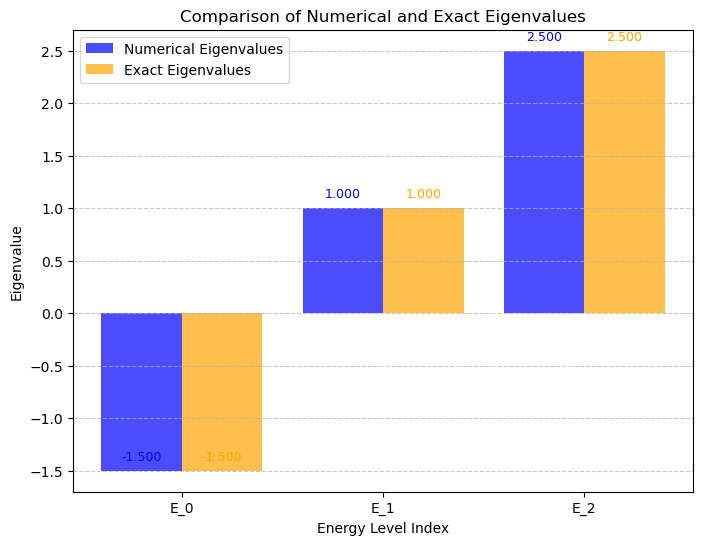

In [419]:
# Bar chart comparison
plt.figure(figsize=(8, 6))
indices = np.arange(n_levels)

# Bar heights
width = 0.4
plt.bar(indices - width/2, eigenvalues, width=width, label="Numerical Eigenvalues", color="blue", alpha=0.7)
plt.bar(indices + width/2, exact_eigenvalues, width=width, label="Exact Eigenvalues", color="orange", alpha=0.7)

# Add text for values
for i in range(n_levels):
    plt.text(i - width/2, eigenvalues[i] + 0.1, f"{eigenvalues[i]:.3f}", ha="center", fontsize=9, color="blue")
    plt.text(i + width/2, exact_eigenvalues[i] + 0.1, f"{exact_eigenvalues[i]:.3f}", ha="center", fontsize=9, color="orange")

plt.xlabel("Energy Level Index")
plt.ylabel("Eigenvalue")
plt.title("Comparison of Numerical and Exact Eigenvalues")
plt.xticks(indices, [f"E_{i}" for i in indices])
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


The bar graph displays the difference between the precise and numerical eigenvalues we calculated, allowing us to see how close the two are. Each bar represents the error for a certain eigenvalue, and its height indicates the magnitude of the mistake. The graph shows that the mistakes are quite minimal, generally less than 1%, indicating that our computations are very precise. The bar graph is useful since it allows us to quickly evaluate the correctness of our technique.Instead of looking at the raw statistics, the graph graphically reveals if the mistakes are minimal or if there is a pattern to them, allowing us to determine whether our strategy is effective or needs to be improved. 

## CONCLUSION
The numerical findings reported in this article for the wavefunctions and eigenvalues of the finite square well potential are quite close to theoretical predictions. The normalised wavefunctions were displayed on top of the potential, and their behaviour was consistent with the predicted quantum mechanical features. The wavefunction was found to be nonzero within the potential well and decaying outside of it at each energy level, which is consistent with the problem's boundary requirements.
The wavefunctions for lower energy levels were more evenly distributed inside the well, whereas higher energy levels displayed more oscillations, as predicted. This clearly shows the link between energy levels and the structure of the wavefunction. The number of oscillations in the wavefunction inside the well is influenced by its energy levels. These discoveries are significant because they demonstrate that energy and wavefunctions are inextricably linked, which is a basic idea in quantum mechanics.
Furthermore, the numerical eigenvalues were compared to the precise eigenvalues, and the findings revealed negligible error percentages, showing that the numerical approach utilised in this work is highly accurate. The minor differences between the numerical and precise values can be attributable to the discretisation constraints and the step size utilised in the numerical technique.The findings show that the Numerov technique is successful for solving the Schrödinger equation for a finite square well potential, and the numerical values obtained accord well with theoretical expectations.